# 1.Introduction to Data

IRIS Flower classification data set is a well known and famous data set in the history of Machine Learning. These 3 types of species characteristics makes this dataset best choice for supervised classification tasks.

# 2.Load the Modules

In [27]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelling lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# 3. Load the Dataset

In [28]:
df = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 4. Exploratory Data Analysis

In [29]:
# describe about the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [30]:
#overall info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
#Unique values that exist
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

# observed no categorical variables in Independent features. Species is a categorical feature

In [32]:
# unique values count in species class
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

All are uniformly distributed

In [33]:
# Missing values/ Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# 5. Feature Selection / Feature Engineering

In [34]:
# from basic info we got to know no impact of ID feature on target
df= df.drop(columns="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# As there is Iris name name in each of the species remove Iris
df_iris_split = df.Species.str.split('-',n=-1,expand =True)
df_iris_split.drop(columns =0,axis=1, inplace=True)
df_iris_split

df =df.join(df_iris_split)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [36]:
# Rename column with species_new
df.rename({1:'species_new'},axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_new
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [37]:
# Now we can remove Species column
df.drop(columns= 'Species',axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_new
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## c. Label Encoding

In [38]:
# converting species_new column into numerical
le = LabelEncoder()
df["species_new"]=le.fit_transform(df["species_new"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_new
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 6. Data Visualization

## a. Univariate 

0.3149109566369728
Axes(0.125,0.11;0.775x0.77)


/tmp/ipykernel_32/90405155.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(df["SepalLengthCm"]))


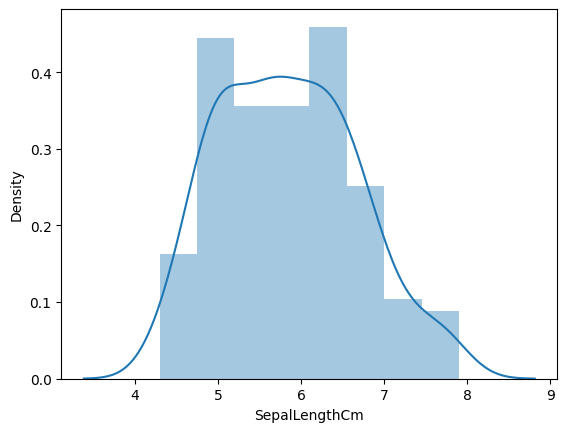

In [39]:
# Feature SepalLengthCm skewness
print(df["SepalLengthCm"].skew(axis=0))
print(sns.distplot(df["SepalLengthCm"]))


SepalLenght normally distributed

0.3340526621720866
Axes(0.125,0.11;0.775x0.77)


/tmp/ipykernel_32/2846899291.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(df["SepalWidthCm"]))


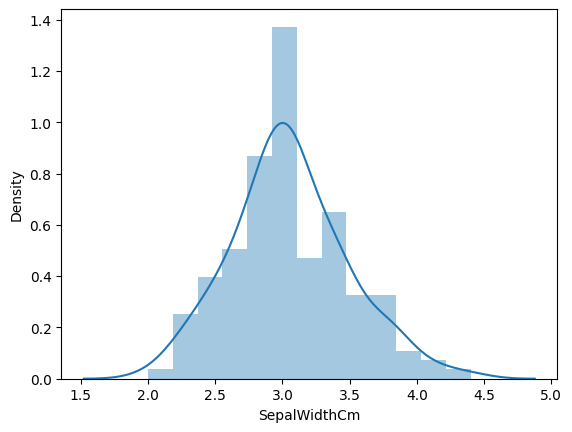

In [40]:
# Feature SepalWidthCm skewness
print(df["SepalWidthCm"].skew(axis=0))
print(sns.distplot(df["SepalWidthCm"]))

SepalWidthCm Normally distributed.

-0.27446425247378287
Axes(0.125,0.11;0.775x0.77)


/tmp/ipykernel_32/2181373379.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(df["PetalLengthCm"]))


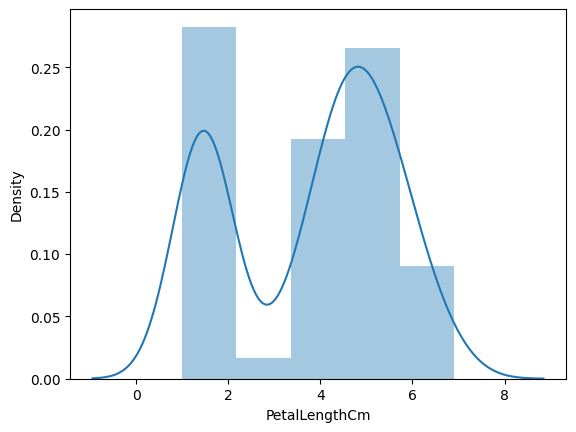

In [41]:
# Feature PetalLengthCm skewness
print(df["PetalLengthCm"].skew(axis=0))
print(sns.distplot(df["PetalLengthCm"]))

Not noramlly distributed

-0.10499656214412734
Axes(0.125,0.11;0.775x0.77)


/tmp/ipykernel_32/1778168173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(df["PetalWidthCm"]))


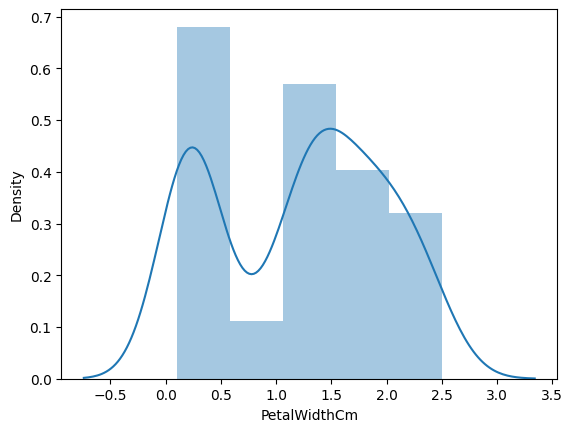

In [42]:
# Feature PetalWidthCm skewness
print(df["PetalWidthCm"].skew(axis=0))
print(sns.distplot(df["PetalWidthCm"]))

Multiple peaks and lows so not normally distributed

<Axes: >

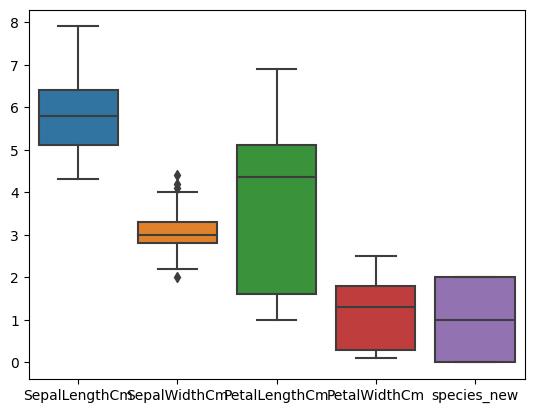

In [43]:
#Outliers find usin Box Plot
sns.boxplot(data=df)

only Sepal width has outliers

## b.Bivariate Analysis

<Axes: >

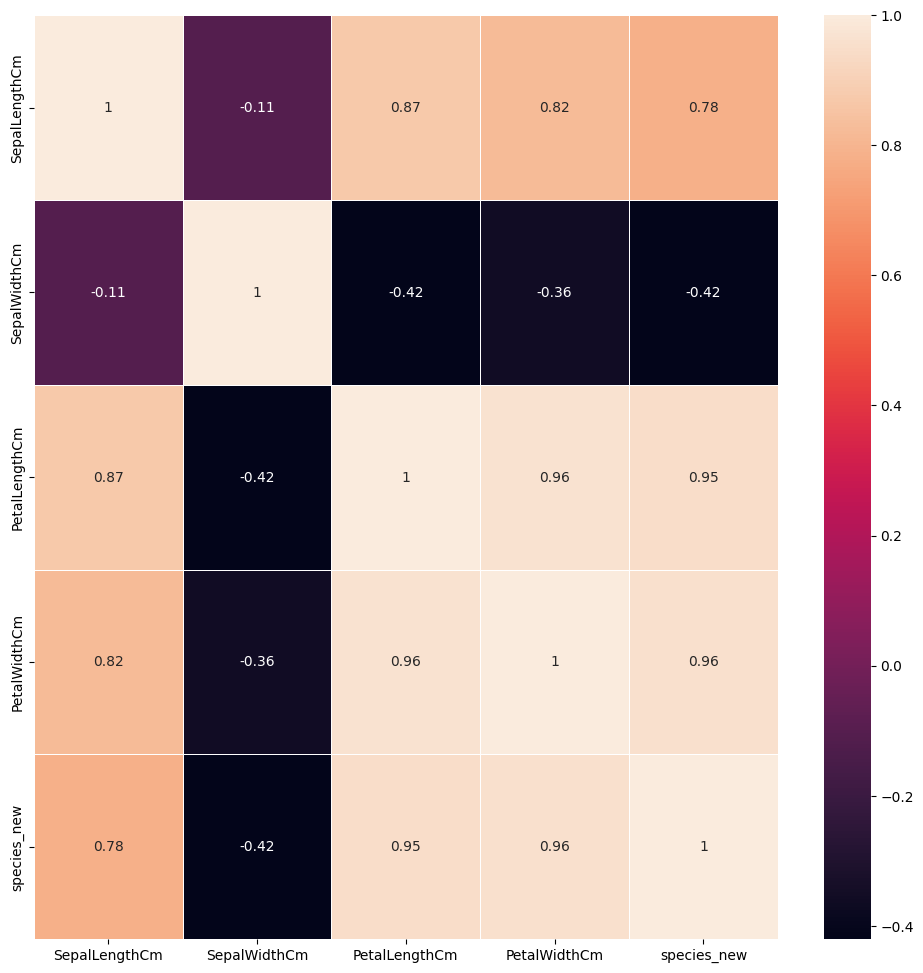

In [44]:
#heat map
df_corr =  df.corr()
fig, ax= plt.subplots(figsize=(12,12))
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax)

### fromheatmap we can conclude that Petal width and Lenght are higly correlated to target feature where as sepal width and length are not correlated

# 7. Data Modeling

In [45]:
# deviding dependent and independent

X= df.drop(["species_new"], axis=1)
y= df["species_new"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

## 7a) Model Training with Logistic Regression

In [47]:
# Logistic Regression
lr =LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [48]:
#prediction
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       2])

### Metrics

In [49]:
from sklearn.metrics import r2_score
print("Logistic Regression Accuracy score", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_pred,y_test))
print("R-Squared value : ", r2_score(y_test,y_pred))

Logistic Regression Accuracy score 95.55555555555556
[[13  0  0]
 [ 0 12  1]
 [ 0  1 18]]
R-Squared value :  0.9358974358974359


### Logistic Regression predicted with Almost 96% accuracy score

## 7b) Model Training with Decision tree Classifier

In [50]:
dc = DecisionTreeClassifier(random_state=0)
dc.fit(X_train,y_train)

y_pred= dc.predict(X_test)

print("Decision Tree Classification Accuracy score", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_pred,y_test))
print("R-Squared value : ", r2_score(y_test,y_pred))

Decision Tree Classification Accuracy score 93.33333333333333
[[13  0  0]
 [ 0 11  1]
 [ 0  2 18]]
R-Squared value :  0.9038461538461539


### Decision Tree classification gave an accuracy of almost 93%

### 7c) Model Training with KNN

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Knearest Neighbors Classification Accuracy score", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_pred,y_test))
print("R-Squared value : ", r2_score(y_test,y_pred))

Knearest Neighbors Classification Accuracy score 93.33333333333333
[[13  0  0]
 [ 0 11  1]
 [ 0  2 18]]
R-Squared value :  0.9038461538461539


# 8. Conclusion

By observing all the three above classification algorithms on Iris data we can see that Logistic Regression gave an highest accuracy of 96%.

So Logistic Regression is the best fitting model for this data.